<a href="https://colab.research.google.com/github/vivekmadambil/Eigenfaceds1/blob/master/PRA_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
import string as string
from scipy.signal import medfilt2d
from matplotlib import image
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from skimage.color import grey2rgb, rgb2grey

In [3]:
#Reading images to Matrix 
folder = "/content/drive/My Drive/z35" 
img=[]
for dirname , dirnames , filenames in os.walk(folder):
  for subdirname in dirnames:
    subject_path = os.path.join(dirname , subdirname )
    for filename in os.listdir( subject_path ):
      im = cv2.imread(os.path.join(subject_path , filename),1)
      img.append(np.asarray(im))

In [4]:
print("Total Images:", len(img))
print("Image Shape:", img[1].shape)

Total Images: 8
Image Shape: (690, 773, 3)


Input Images


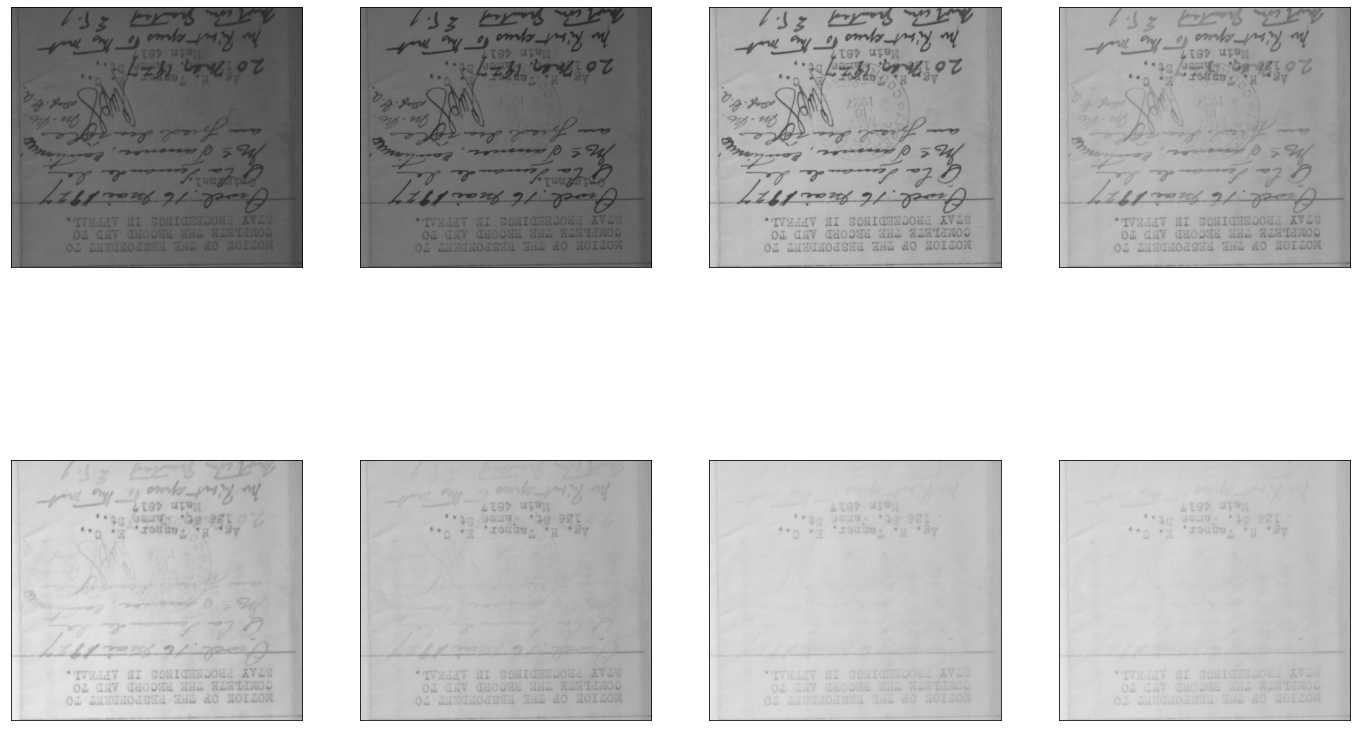

In [5]:
fig = pyplot.figure(figsize=(24, 32))
print("Input Images")
for i in range(len(img)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(img[i])

**Median Filter**

In [6]:
original_shape = img[0].shape
print("original shape",original_shape)

original shape (690, 773, 3)


In [7]:
img1=np.zeros([original_shape[0],original_shape[1],original_shape[2],len(img)],
              dtype=int) 
for j in range(len(img)):
  temp=img[j]
  for i in range(3):
    img1[:,:,i,j]= medfilt2d(temp[:,:,i],kernel_size=[73,73])

In [8]:
img0=np.zeros([original_shape[0],original_shape[1],original_shape[2],len(img)])
for i in range(len(img)):
  img0[:,:,:,i]=img[i]

In [9]:
img2=np.zeros([original_shape[0],original_shape[1],original_shape[2],len(img)])
img2=img0-img1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After Median Filter


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


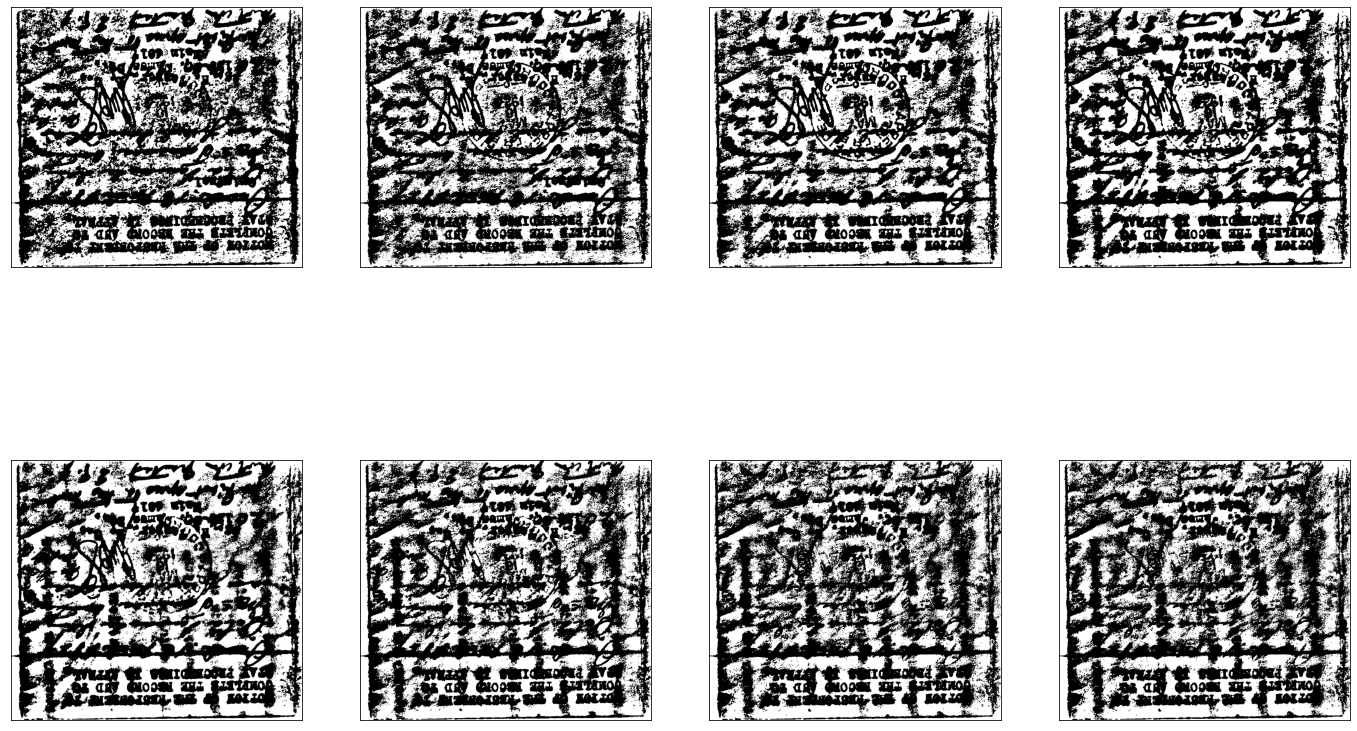

In [10]:
fig1 = pyplot.figure(figsize=(24, 32))
print("After Median Filter")  
for i in range(len(img)):
  t=[]
  t=img2[:,:,:,i]
  ax1 = fig1.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
  ax1.imshow(t)

In [11]:
img3=[]
img3 = img2.reshape((img2.shape[0]*img2.shape[1]), img2.shape[2],img2.shape[3])

**Kmeans**

In [12]:
k=np.zeros([10,3,8])
for i in range(8):
  t=[]
  t=img3[:,:,i]
  kmeans = KMeans(n_clusters=10, random_state=0).fit(t)
  k[:,:,i]=kmeans.cluster_centers_

**GMM 1**

In [13]:

gm1_it=np.zeros([8], dtype=int)
gm1_m=np.zeros([10,3,8])
gm1_v=np.zeros([10,3,3,8])
gm1_l=np.zeros([533370,8], dtype=int)
for i in range(len(img)):
  t=[]
  t=img3[:,:,i]
  gmm_model_1 = GMM(n_components=10, covariance_type='full',max_iter=500,
                  weights_init=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                  means_init=k[:,:,i]).fit(t) 
  gm1_l[:,i] = gmm_model_1.predict(t)
  gm1_it[i]=gmm_model_1.n_iter_
  gm1_m[:,:,i]=gmm_model_1.means_
  gm1_v[:,:,:,i]=gmm_model_1.covariances_

In [14]:
print("Optimal EM Iterations of GMM 1:", gm1_it)
print("Labels Shape:", gm1_l[:,0].shape,"Mean Shape:", gm1_m[:,:,0].shape,
      "Variance Shape:", gm1_v[:,:,0].shape)

Optimal EM Iterations of GMM 1: [8 7 8 6 7 8 7 7]
Labels Shape: (533370,) Mean Shape: (10, 3) Variance Shape: (10, 3, 8)


Mask 1 of all Images


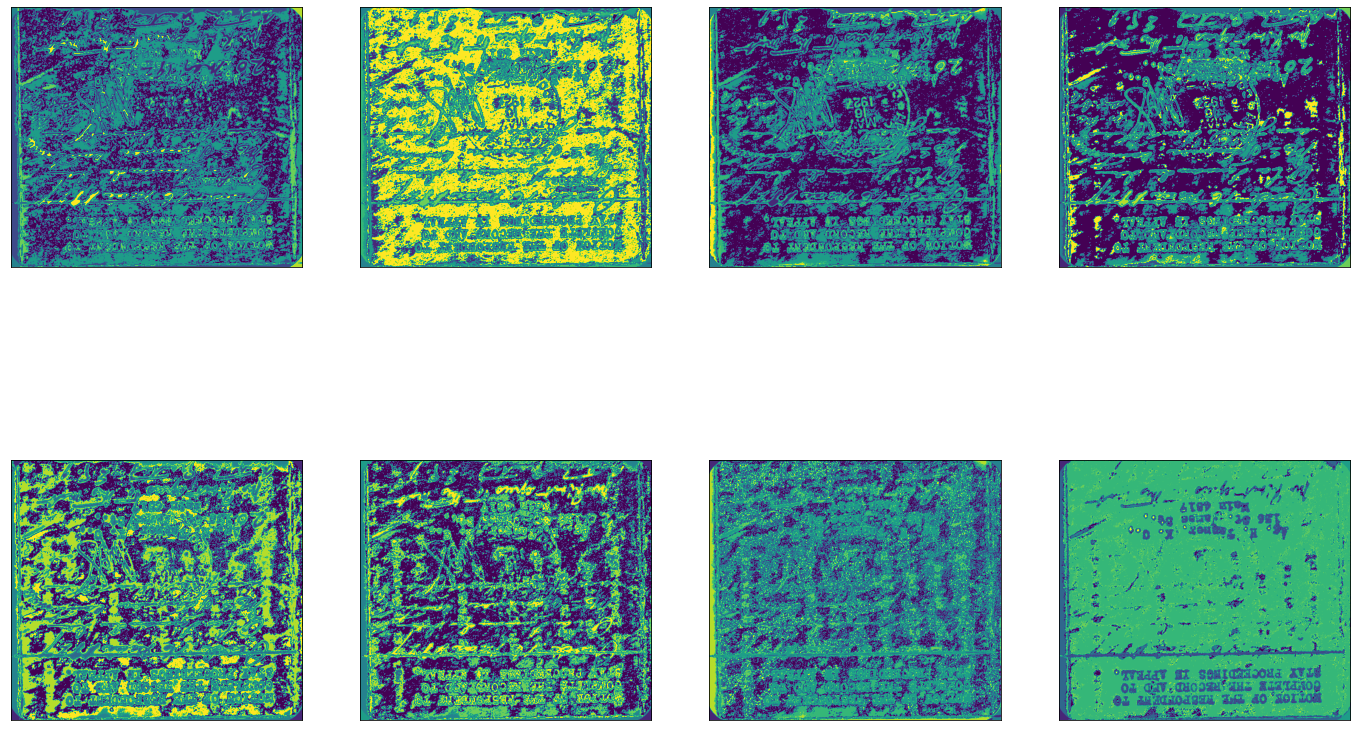

In [15]:
original_shape = img[0].shape
print("Mask 1 of all Images")
fig1 = pyplot.figure(figsize=(24, 32))
for i in range(len(img)):
  img4=[]
  img4 = gm1_l[:,i].reshape(original_shape[0], original_shape[1])
  ax1 = fig1.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
  ax1.imshow(img4) 

**GMM 2**

In [16]:
gm2_it=np.zeros([8], dtype=int)
gm2_l=np.zeros([533370,8], dtype=int)
for i in range(len(img)):
  t=[]
  t=img3[:,:,i]
  gmm_model_2 = GMM(n_components=10, covariance_type='full',max_iter=500,
                  weights_init=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],                  
                    means_init=gm1_m[:,:,i],
                    precisions_init=gm1_v[:,:,:,i]).fit(t) 
  gm2_l[:,i] = gmm_model_2.predict(t)
  gm2_it[i] = gmm_model_2.n_iter_

In [17]:
print("Optimal EM Iterations of GMM 2:", gm2_it)

Optimal EM Iterations of GMM 2: [15 16 18 10 10 13 16 27]


Mask 2 of all Images


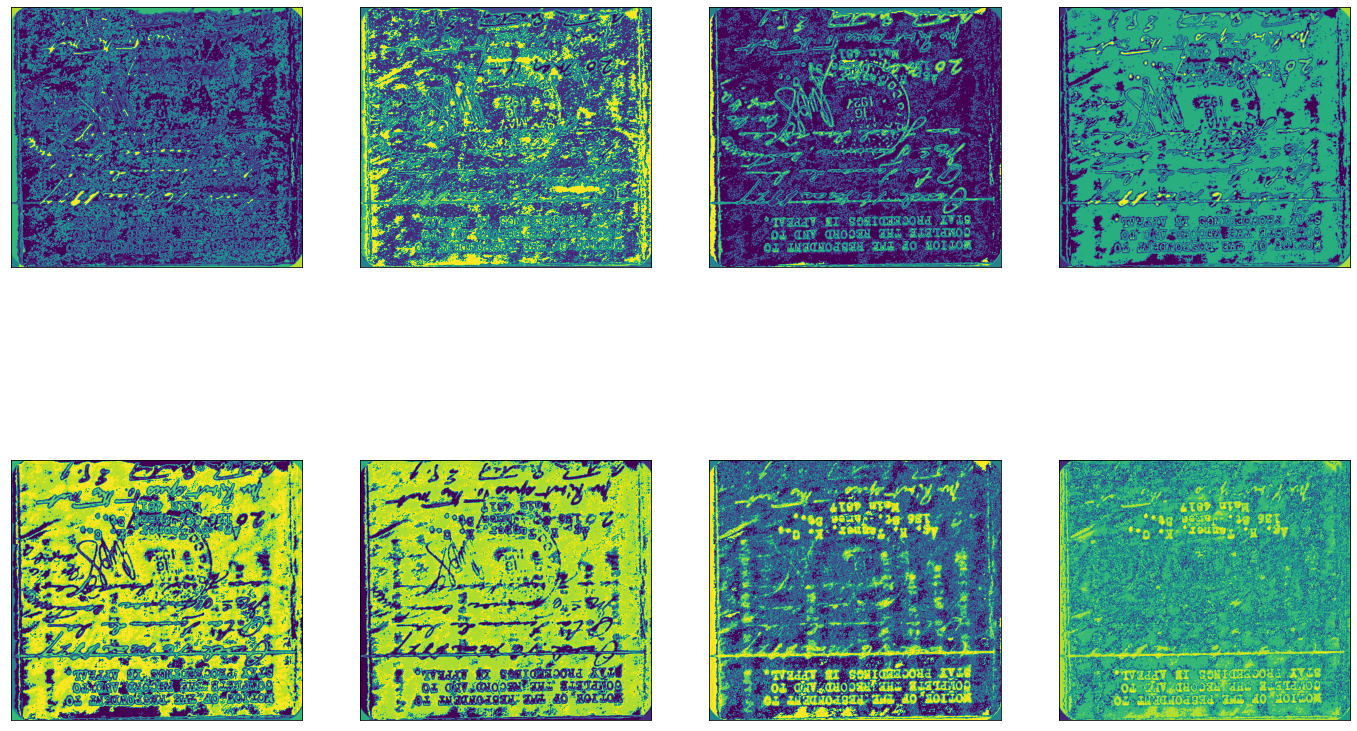

In [18]:
original_shape = img[0].shape
print("Mask 2 of all Images")
fig1 = pyplot.figure(figsize=(24, 32))
for i in range(len(img)):
  img4=[]
  img4 = gm2_l[:,i].reshape(original_shape[0], original_shape[1])
  ax1 = fig1.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
  ax1.imshow(img4)

**Mask Multiplication**

In [19]:
mask=np.zeros([533370,8],dtype=int)
mask=gm1_l*gm2_l
mask1=mask.reshape(690,773,8)
mask1.shape

(690, 773, 8)

In [20]:
img8=[]
for i in range(8):
  t=[]
  t= grey2rgb(mask1[:,:,i])
  img8.append(t)

In [21]:
img9=[]
for i in range(8):
  img9.append(img[i]-img8[i])#subtracting from each MS image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Images after applying Mask


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


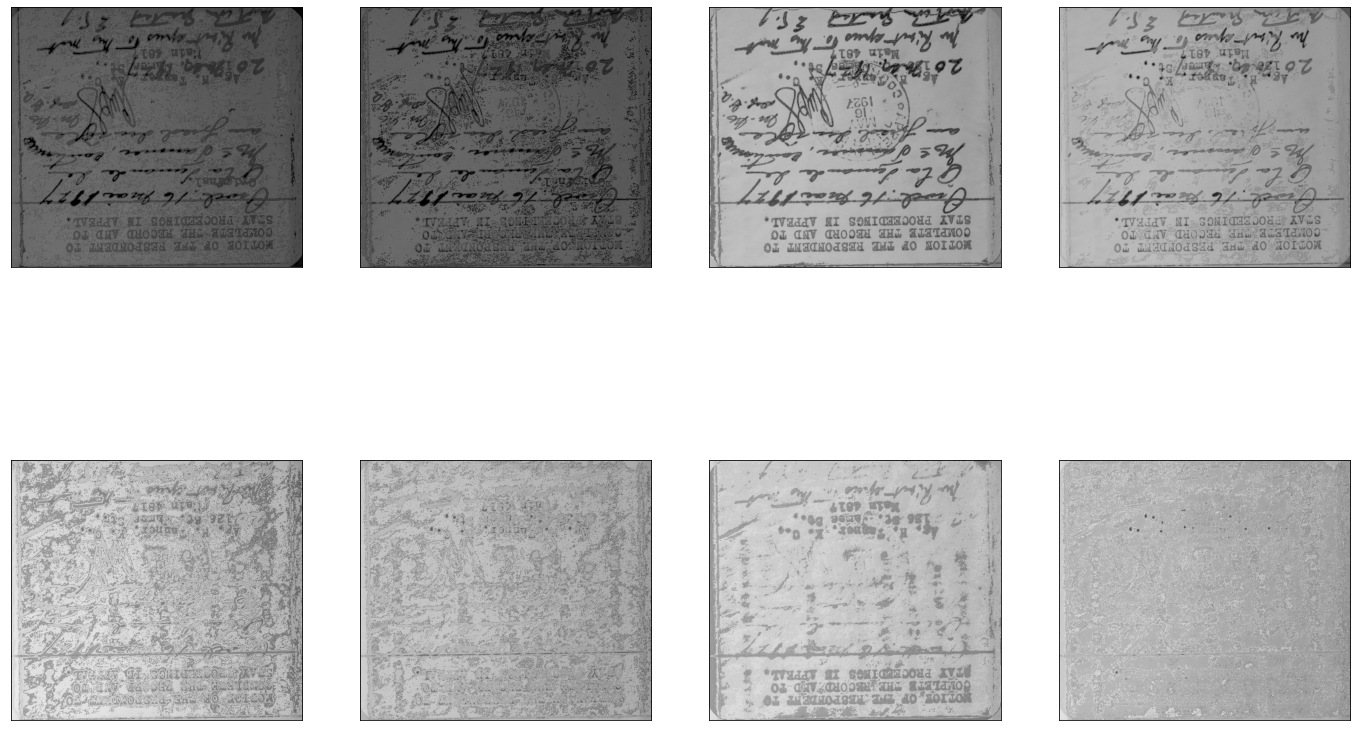

In [22]:
print(" Images after applying Mask")
fig1 = pyplot.figure(figsize=(24, 32))
for i in range(len(img)):
  ax1 = fig1.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
  ax1.imshow(img9[i],cmap='gray')

**Segmentation**

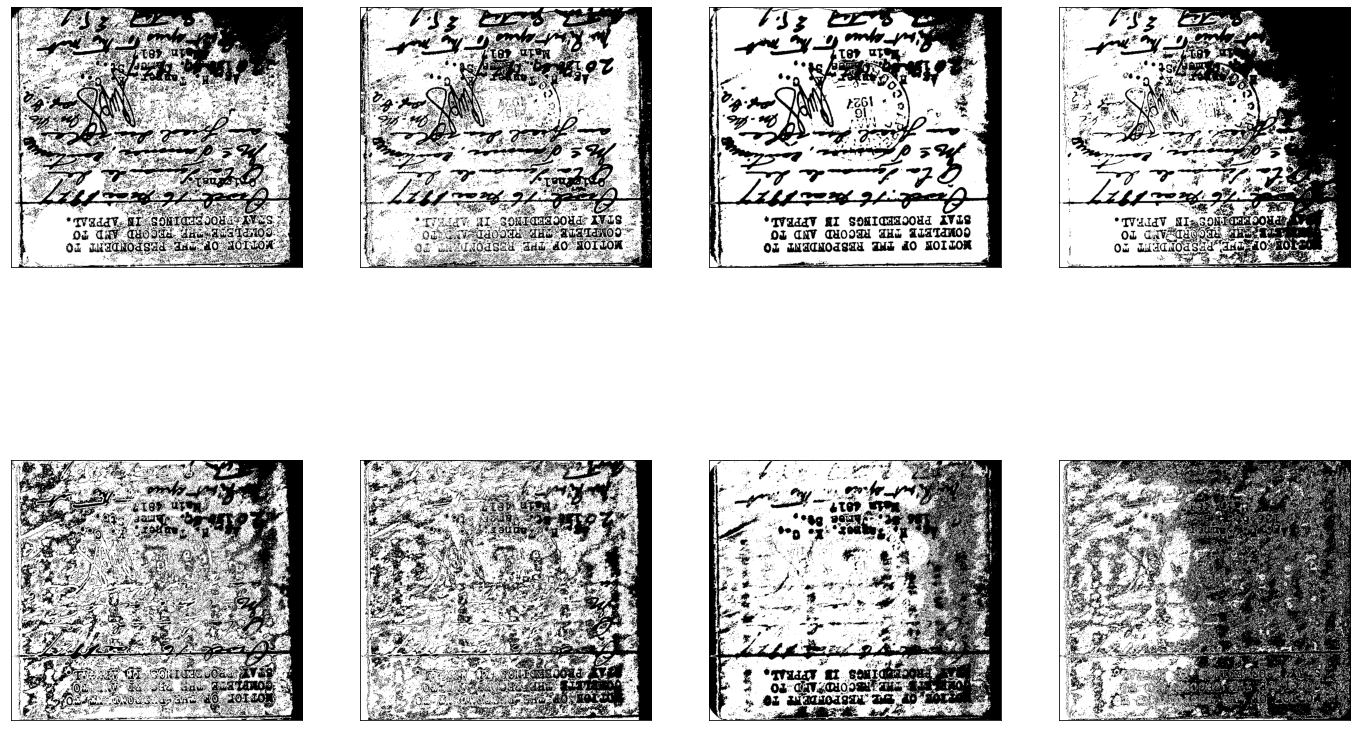

In [23]:
fig1 = pyplot.figure(figsize=(24, 32))
img10,img11,gray_r,gray,imgg9=[],[],[],[],[]
for j in range(8):
  img10=img9[j]
  img11=img10[:,:,0]
  gray_r = img11.reshape(img11.shape[0]*img11.shape[1])
  m=gray_r.mean()
  for i in range(len(gray_r)):
    if (gray_r[i] > m):
        gray_r[i] = 1
    else:
        gray_r[i] = 0
  gray = gray_r.reshape(img11.shape[0],img11.shape[1])
  ax1 = fig1.add_subplot(4, 4, j + 1, xticks=[], yticks=[])
  ax1.imshow(gray,cmap='gray')